In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from pandas import Series, DataFrame

### UCI Machine Learning Repository : Heart Disease Dataset



The following analysis is based on the UCI Machine Learning Repository dataset on Heart Disease : 
http://archive.ics.uci.edu/ml/datasets/Heart+Disease

The goal of our analysis is to be able to predict whether a patient will have a heart disease based on the following attributes 


* age (in years)
* sex ( 1 = male, 0 = female)
* cp ( chest pain type ) 
    * Value 1 : typical angina
    * Value 2 : atypical angina
    * Value 3 : non-anginal pain
    * Value 4 : asymptomatic
* trestbps : resting blood pressure on admission to the hosptial in mmHg
* chol : serum cholestrol in mg/dl
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* restecg :  resting electrocardiographic results 
    * Value 0 : normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    * Value 2 :  showing probable or definite left ventricular hypertrophy by Estes' criteria 
* thalach : maximum heart rate achieved
* exang : exercise induced angina (1 = yes; 0 = no) 
* oldpeak : ST depression induced by exercise relative to rest 
* slope :  the slope of the peak exercise ST segment 
    * Value 1 : unsloping
    * Value 2 : flat
    * Value 3 : downsloping
* ca :  number of major vessels (0-3) colored by flourosopy
* thal :  3 = normal; 6 = fixed defect; 7 = reversable defect 
* num : Confidence of presence of heart disease ( 0 = false diagnostic, 1 = true diagnostic)

In [3]:
heart_df = pd.read_csv("/media/adithya/0920-EB7E/HeartDiseasePrediction/processed.cleveland.data", names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','diag'], sep = ",")


In [4]:
heart_df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diag
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
#Converting all diags to 1's or 0's 

for i in xrange(0, len(heart_df)):
    if heart_df['diag'].ix[i] > 1 :
        heart_df['diag'].ix[i] = 1
    

/home/adithya/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
#checking our conversion
np.unique(heart_df['diag'])

array([0, 1])

Before we continue with our prediction, we need to analyse our data and understand it well. We need to ask ourselves a few questions that will help us gain an understanding of what we should expect after performing our prediction analysis and look for any trends in the data

### Who is our main demographic ? 

In [7]:
chance_of_disease = heart_df.groupby('diag')

In [8]:
chance_of_disease.mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
diag,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537
1,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338


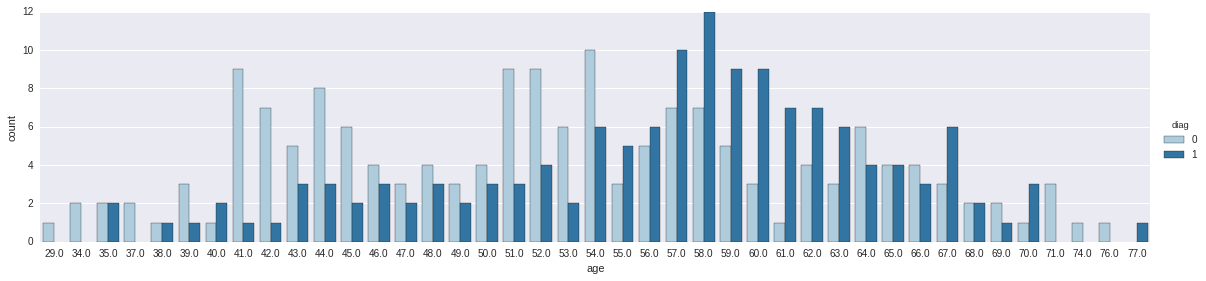

In [9]:
sns.factorplot('age', data = heart_df, kind = 'count', palette = 'Paired', hue = 'diag', aspect = 4)

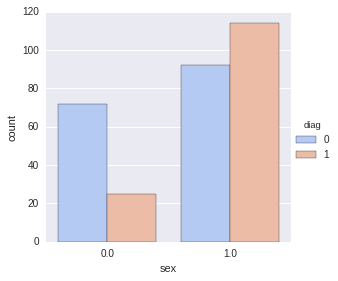

In [10]:
sns.factorplot('sex', data = heart_df, kind = 'count', palette = 'coolwarm', hue = 'diag')

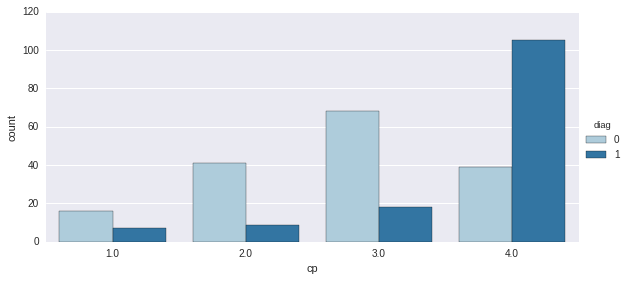

In [11]:
sns.factorplot('cp', data = heart_df, kind = 'count', palette = 'Paired', hue = 'diag', aspect = 2)

From the above three plots, we can get a brief idea of who makes our affected demographic. Which consists mainly of Men, in their late 50's who dont experience chest pain although they do have a heart disease (asymptotic). Good reason to get checked regularly as we may not even experience the effects


### How do attributes correlate between those who have the disease and those who dont?


Finding how certain attributes are correlated gives us great insight into what effects those who are affected by heart disease experience differently from those who dont. Such attributes and correlations provide early indication of heart diseases.

In [12]:
#diag_0 is the correlation matrix between attributes for those who were diagonised as not affected by heart disease
diag_0 = chance_of_disease.corr().ix[0]

In [13]:
#diag_1 is the correlation matrix between attributes for those who were diagonised as being affected by heart disease
diag_1 = chance_of_disease.corr().ix[1]

/home/adithya/anaconda2/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/home/adithya/anaconda2/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


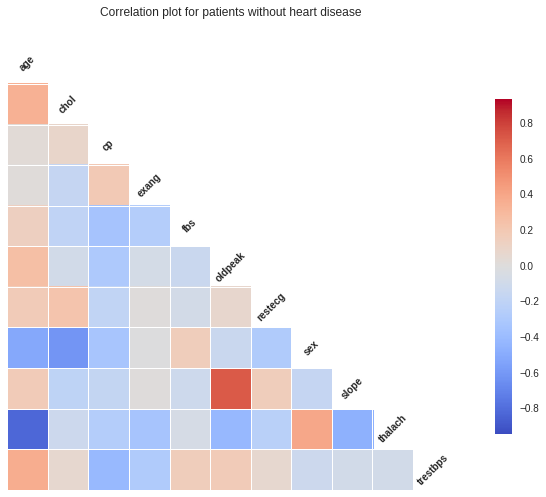

In [14]:
fig, ax = plt.subplots(figsize = (15,8))
sns.corrplot(diag_0, annot = False, ax = ax, cmap = "coolwarm")
ax.set_title("Correlation plot for patients without heart disease")


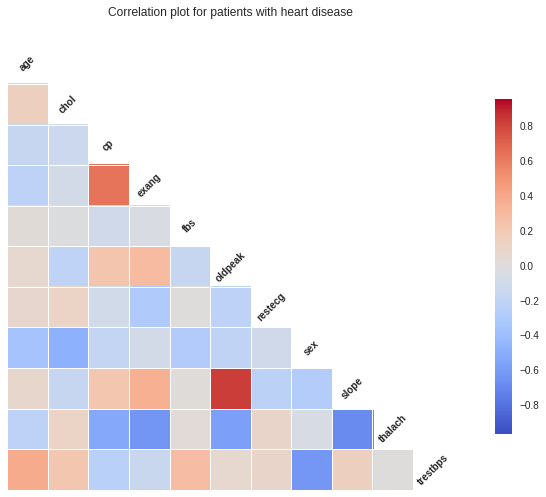

In [15]:
fig, ax = plt.subplots(figsize = (15,8))
sns.corrplot(diag_1, annot = False, ax = ax, cmap = "coolwarm")
ax.set_title("Correlation plot for patients with heart disease")


Upon observation of both the scatterplot, we can see the increase in correlation between the chest pain type and chest pain and exercise related pain (angina) for those affected. Also we notice the increase in (although still negetive) correlation between age and the maximum heart rate achieved. These are just a few observations that we can see upon glancing at the two plots

### Machine Learning and Predictions


Now that we have a feel for our data, let us use prediction models to fit our data and judge the accuracy of our predictions

In [16]:
from sklearn.cross_validation import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

##### While trying some test analysis using some previous cells, i noticed some unique data that may have creeped in. So we may have to clean up our data a bit more to fully prepare it for prediction models


In [17]:
pd.unique(heart_df['ca'])

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

Seems like whoever made the dataset decided to use '?' to indicate missing data, and that threw an error while i tried to perfrom LogisticRegression. Makes sense. Lets check for similar cases in all our other columns

In [18]:
indices = heart_df.columns
indices

Index([u'age', u'sex', u'cp', u'trestbps', u'chol', u'fbs', u'restecg',
       u'thalach', u'exang', u'oldpeak', u'slope', u'ca', u'thal', u'diag'],
      dtype='object')

In [19]:
for index in indices:
    print pd.unique(heart_df[index])
    print "___________________________"

[ 63.  67.  37.  41.  56.  62.  57.  53.  44.  52.  48.  54.  49.  64.  58.
  60.  50.  66.  43.  40.  69.  59.  42.  55.  61.  65.  71.  51.  46.  45.
  39.  68.  47.  34.  35.  29.  70.  77.  38.  74.  76.]
___________________________
[ 1.  0.]
___________________________
[ 1.  4.  3.  2.]
___________________________
[ 145.  160.  120.  130.  140.  172.  150.  110.  132.  117.  135.  112.
  105.  124.  125.  142.  128.  170.  155.  104.  180.  138.  108.  134.
  122.  115.  118.  100.  200.   94.  165.  102.  152.  101.  126.  174.
  148.  178.  158.  192.  129.  144.  123.  136.  146.  106.  156.  154.
  114.  164.]
___________________________
[ 233.  286.  229.  250.  204.  236.  268.  354.  254.  203.  192.  294.
  256.  263.  199.  168.  239.  275.  266.  211.  283.  284.  224.  206.
  219.  340.  226.  247.  167.  230.  335.  234.  177.  276.  353.  243.
  225.  302.  212.  330.  175.  417.  197.  198.  290.  253.  172.  273.
  213.  305.  216.  304.  188.  282.  185.  232.  326

As we can see, it is the second and third last columns (thal and ca) that hold these funny values. Lets change them up.
In case of column 'ca', we can perhaps use the rounded column average to fill in the '?' values. 
In case of column 'thal', the dataset uses dummy variables, in order to get rid of these while keeping our data intact, we will use get_dummies and create a new dataframe for these dummy variables and append them to our original dataframe

Lets first handle our 'ca' column by removing unnessary values and making it numerical 

In [20]:
heart_df['ca'] = heart_df['ca'].replace('?', np.nan)

In [21]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diag
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [22]:
heart_df['ca'] = pd.to_numeric(heart_df['ca'])

Next, lets handle the categorical values in the 'thal' column

In [23]:
heart_df['thal'] = heart_df['thal'].replace('?', np.nan)

In [24]:
heart_df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal         object
diag          int64
dtype: object

In [25]:
thal_dummies = pd.get_dummies(heart_df['thal'])

In [26]:
heart_df = heart_df.drop('thal',1)

In [27]:
heart_df = pd.concat([heart_df,thal_dummies], axis = 1)

In [28]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,diag,3.0,6.0,7.0
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,0,0.0,1.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,1,1.0,0.0,0.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,1,0.0,0.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,0,1.0,0.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,0,1.0,0.0,0.0


In [29]:
#Fill in the NA values in 'ca'
meanCA = round(heart_df['ca'].mean())

In [30]:
meanCA

1.0

In [31]:
heart_df['ca'] = heart_df['ca'].fillna(meanCA)

In [32]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,diag,3.0,6.0,7.0
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,0,0.0,1.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,1,1.0,0.0,0.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,1,0.0,0.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,0,1.0,0.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,0,1.0,0.0,0.0


Great, our data looks better than before. Lets try running it through some models

In [33]:
target = heart_df['diag']

In [34]:
data = heart_df.drop('diag',1)

#### Support Vector Classification

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target)

In [36]:
model = SVC(kernel = 'linear', C = 2)

In [37]:
model.fit(X_train, Y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
predictions = model.predict(X_test)

In [39]:
from sklearn import metrics


In [40]:
print metrics.accuracy_score(Y_test,predictions)

0.842105263158


In [41]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(model,data,target, cv=10)


In [42]:
scores

array([ 0.87096774,  0.80645161,  0.80645161,  0.96774194,  0.8       ,
        0.7       ,  0.8       ,  0.83333333,  0.7       ,  0.82758621])

In [43]:
scores.mean()

0.81125324434556911

Lets try changing the penalty metric for the support vector classifier

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target)

In [45]:
model = SVC(kernel = 'linear', C = 500)

In [46]:
model.fit(X_train, Y_train)

SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
predictions = model.predict(X_test)

In [48]:
metrics.accuracy_score(Y_test, predictions)

0.88157894736842102

In [49]:
scores = cross_validation.cross_val_score(model,data,target, cv=10)
scores

array([ 0.83870968,  0.74193548,  0.80645161,  0.90322581,  0.8       ,
        0.7       ,  0.73333333,  0.93333333,  0.76666667,  0.79310345])

In [50]:
scores.mean()

0.80167593622543565

We get about the same mean cross-validation scores for both cases. 

#### Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rfc = RandomForestClassifier(n_estimators = 10)

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(data,target)

In [126]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [127]:
predictions = rfc.predict(X_test)

In [128]:
metrics.accuracy_score(Y_test, predictions)

0.78947368421052633

In [129]:
scores = cross_validation.cross_val_score(rfc,data,target,cv = 15)
scores

array([ 0.9047619 ,  0.85714286,  0.80952381,  0.85714286,  0.95      ,
        0.85      ,  0.85      ,  0.85      ,  0.7       ,  0.75      ,
        0.7       ,  0.85      ,  0.75      ,  0.75      ,  0.84210526])

In [130]:
scores.mean()

0.81804511278195491